In [4]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.append('../utils')
import simulation as sim
import numpy as np
import random
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 200

# Definir el plano del hospital


In [5]:
width = 53
height = 36
hospital = sim.Hospital(width, height)

for i in range(width):
    hospital.add_element(sim.Wall((i, 0)))
    hospital.add_element(sim.Wall((i, height - 1)))
for i in range(height):
    hospital.add_element(sim.Wall((0, i)))
    hospital.add_element(sim.Wall((width-1, i)))
    
for y in range(36):
    l = (4, 5, 13, 19, 25, 31)
    if y not in l:
        hospital.add_element(sim.Wall((9, y)))
        
for x in range(9):
    for y in (10, 16, 22, 28):
        hospital.add_element(sim.Wall((x, y)))

for y in range(9):
    if y not in (5, 6):
        hospital.add_element(sim.Wall((14, y)))

for y in range(9, 19):
    for x in (14, 23, 32, 41):
        hospital.add_element(sim.Wall((x, y)))

for x in range(14, 52):
    hospital.add_element(sim.Wall((x, 9)))
    
    if x not in (19, 28, 38, 46, 18, 27, 36, 45):
        hospital.add_element(sim.Wall((x, 18)))
        
for x in range(29, 52):
    hospital.add_element(sim.Wall((x, 23)))

for x in range(29, 40):
    if x not in (34, 35):
        hospital.add_element(sim.Wall((x, 28)))

for y in range(23, 28):
    hospital.add_element(sim.Wall((29, y)))
    hospital.add_element(sim.Wall((39, y)))
    
hospital.add_element(sim.Entry((width-9, height-1)))
hospital.add_element(sim.Exit((width-8, height-1)))
hospital.add_element(sim.ICU((14, 5)))

for y in (13, 19, 25, 31):
    hospital.add_element(sim.DoctorOffice('general_practitioner', (3, y), (4, y)))
hospital.add_element(sim.DoctorOffice('psychiatrist', (3, 5), (4, 5)))
hospital.add_element(sim.DoctorOffice('surgeon', (18, 13), (18, 14)))
hospital.add_element(sim.DoctorOffice('pediatry', (27, 13), (27, 14)))
hospital.add_element(sim.DoctorOffice('gynecologist', (36, 13), (36, 14)))
hospital.add_element(sim.DoctorOffice('geriatrics', (45, 13), (45, 14)))

hospital.add_element(sim.Receptionist((45, 25), (45, 27)))
hospital.add_element(sim.Receptionist((48, 25), (48, 27)))

hospital.add_element(sim.Triage((35, 26)))

for x in range(14, 28, 2):
    for y in range(22, 31, 2):
        hospital.add_element(sim.Chair((x, y)))

# Imprime el hospital para tener algún tipo de feedback
hospital.plot().to_console()

############################################EX#######
#        #                                          #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    h h h h h h h                         #
#        #                                          #
##########    h h h h h h h  #####  ####            #
#        #                   #         #     P  P   #
#        #    h h h h h h h  #     T   #            #
#  DP                        #         #     R  R   #
#        #    h h h h h h h  #         #            #
#        #                   ########################
##########    h h h h h h h                         #
#        #                                          #
#        #                                          #
#  DP                                               #
#        #    ####  #######  ####### # ######  ######
#        #    #        #    

# Agrega los parámetros de simulación

In [6]:
    
hospital.parameters = {
    'objects': {
        'chair': {
            'infect_probability': 0.1,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0),
            'radius': 0.1
        },
        'bed': {
            'infect_probability': 0.0,
            'radius': 0.0,
            'cleaning_interval': sim.TimePeriod(0, 2, 0, 0)
        }
    },
    'icu': {
        'environment': {
            'infection_probability': 0.1
        },
        'beds': 5,
        'death_probability': 0.05,
        'sleep_times': [
            {
                'time': sim.TimePeriod(1, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(2, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(4, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(8, 0, 0, 0),
                'probability': 0.2
            },
            {
                'time': sim.TimePeriod(16, 0, 0, 0),
                'probability': 0.2
            }
        ]
    },
    'reception': {
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'triage': {
        'icu': {
            'death_probability': 0.2,
            'probability': 0.070724557
        },
        'doctors_probabilities': [
            {
                'specialty': 'general_practitioner',
                'probability': 0.444567551
            },
            {
                'specialty': 'psychiatrist',
                'probability': 0.045610876
            },
            {
                'specialty': 'surgeon',
                'probability': 0.292939085
            },
            {
                'specialty': 'pediatry',
                'probability': 0.051335318
            },
            {
                'specialty': 'gynecologist',
                'probability': 0.075895021
            },
            {
                'specialty': 'geriatrics',
                'probability': 0.018927592
            },
        ],
        'levels': [
            {
                'level': 1,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 0, 0)
            },
            {
                'level': 2,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 15, 0)
            },
            {
'level': 3,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 0, 30, 0)
            },
            {
                'level': 4,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 1, 0, 0)
            },
            {
                'level': 5,
                'probability': 0.2,
                'wait_time': sim.TimePeriod(0, 2, 0, 0)
            }
        ],
        'attention_time': sim.TimePeriod(0, 0, 15, 0)
    },
    'doctors': [
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'general_practitioner'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'psychiatrist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'surgeon'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'gynecologist'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'geriatrics'
        },
        {
            'attention_duration': sim.TimePeriod(0, 0, 15, 0),
            'specialty': 'pediatry'
        },
    ],
    'patient': {
        'walk_speed': 0.05,
        'influx': np.array([[random.randint(1, 10) for i in range(12)] for j in range(365)]),
        'infected_probability': np.array([0.2 for d in range(365)])
    },
    'human': {
        'infect_distance': 2.0,
        'contamination_probability': 0.1,
        'incubation_time': {
            'min' : sim.TimePeriod(0, 14, 0, 0),
            'max' : sim.TimePeriod(6, 0, 0, 0)
        },
        'infect_probability': 0.5
    },
    'personnel': {
        'immunity': 0.4
    },
    'environments': {
        'icu': {
            'infection_probability': 0.8
        }
    }
}

# Valida que esten todos los parámetros necesarios
hospital.validate()

# Define las propiedades de ejecución
(Parámetros relacionados al sistema o la ejecución y no al hospital)

In [7]:
props = sim.SimulationProperties(1, 1)

In [8]:
run = sim.Simulation(props, hospital, tag='latest')
run.run(print_command=True)

/home/martin/Repositories/sti-hpc/lib/mpich/bin/mpiexec -np 1 /home/martin/Repositories/sti-hpc/build/sti-demo /home/martin/Repositories/sti-hpc/run/59689c86d3164d014692fa75d17bdef2/config.props /home/martin/Repositories/sti-hpc/run/59689c86d3164d014692fa75d17bdef2/model.props

=   BAD TERMINATION OF ONE OF YOUR APPLICATION PROCESSES
=   PID 74705 RUNNING AT martin-ubuntu-kvm
=   EXIT CODE: 134
=   CLEANING UP REMAINING PROCESSES
=   YOU CAN IGNORE THE BELOW CLEANUP MESSAGES
YOUR APPLICATION TERMINATED WITH THE EXIT STRING: Aborted (signal 6)
This typically refers to a problem with your application.
Please see the FAQ page for debugging suggestions

terminate called after throwing an instance of 'boost::wrapexcept<std::out_of_range>'
  what():  out of range



# Analiza la performance un poco

In [9]:
import sys
sys.path.append('../utils')
import performance as perf

metrics = perf.Metrics(f"{run.folder}")

ValueError: No objects to concatenate

In [93]:
print(f"Simulation time: {metrics.total_time}")

Simulation time: 0 days 00:00:37.306198287


In [94]:
try:
    metrics.plot().pie()
except AttributeError:
    pass

In [95]:
try:
    metrics.plot().plot(0)
except AttributeError:
    pass

# Analiza el comportamiento de los agentes

In [96]:
import postprocess as pp
import pandas as pd

In [97]:
agents = pp.AgentsOutput(f"{run.folder}")

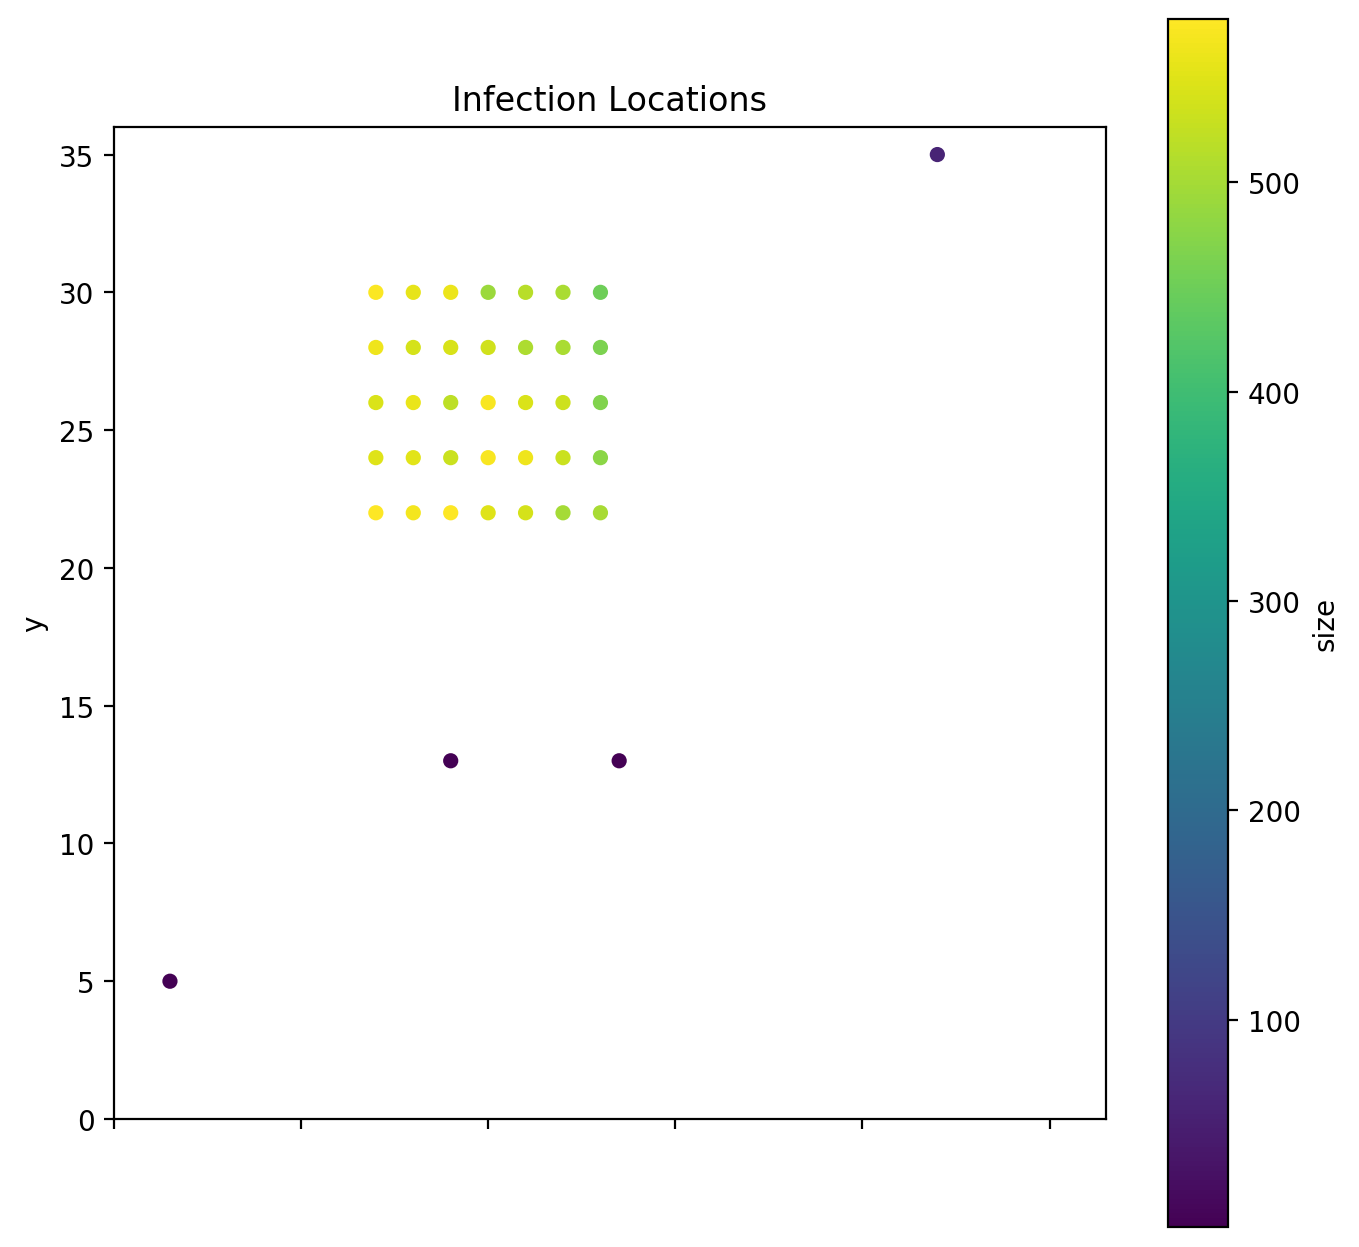

In [98]:
df = pd.concat([agents.patients, agents.staff])
oc = df[['infect_location.x', 'infect_location.y']]
oc = oc.rename(columns={'infect_location.x' : 'x', 'infect_location.y' : 'y'})
oc = oc[(oc['x'] != 0.0) | (oc['y'] != 0.0)]
oc = oc.groupby(['x', 'y'], as_index=False).size()
ax = oc.plot.scatter(x='x', y='y', c='size', colormap='viridis',
                     xlim=(0, hospital.dimensions[0]),
                     ylim=(0, hospital.dimensions[1]),
                     title='Infection Locations'
                     )
ax.set_aspect(hospital.dimensions[0] / hospital.dimensions[1])

In [99]:
dead = agents.patients[agents.patients.last_state ==  'MORGUE'].dropna(axis='columns')
dead['in_hospital'] = dead['exit_time'] - dead['entry_time']
dead['walking_time'] = dead['in_hospital'] - dead['sleep_time']
dead

,repast_id,type,entry_time,exit_time,last_state,process,infection_id,infection_model,infection_mode,infection_stage,infection_time,infected_by,infect_location.x,infect_location.y,incubation_end,diagnosis_type,sleep_time,survives,in_hospital,walking_time
0,35.0.1,patient,0 days 07:00:00,4 days 13:57:00,MORGUE,0,human.35.0.1,human,normal,sick,0 days 13:09:00,chair.0.21,20.0,24.0,2 days 09:05:03,icu,4 days,False,4 days 06:57:00,0 days 06:57:00
1,228.0.1,patient,3 days 00:00:00,4 days 16:09:00,MORGUE,0,human.228.0.1,human,normal,incubating,3 days 14:38:00,chair.0.22,20.0,26.0,8 days 21:19:18,icu,1 days,False,1 days 16:09:00,0 days 16:09:00
2,1113.0.1,patient,16 days 19:43:00,19 days 12:51:00,MORGUE,0,human.1113.0.1,human,normal,incubating,17 days 11:21:00,chair.0.21,20.0,24.0,23 days 09:40:49,icu,2 days,False,2 days 17:08:00,0 days 17:08:00
3,2763.0.1,patient,41 days 08:24:00,43 days 02:09:00,MORGUE,0,human.2763.0.1,human,normal,incubating,42 days 01:22:00,chair.0.39,26.0,30.0,43 days 04:37:34,icu,1 days,False,1 days 17:45:00,0 days 17:45:00
4,3204.0.1,patient,47 days 18:00:00,50 days 11:10:00,MORGUE,0,human.3204.0.1,human,normal,incubating,48 days 09:47:00,chair.0.38,26.0,28.0,51 days 00:14:08,icu,2 days,False,2 days 17:10:00,0 days 17:10:00
5,4457.0.1,patient,66 days 23:00:00,75 days 16:30:00,MORGUE,0,human.4457.0.1,human,normal,sick,67 days 14:51:00,chair.0.26,22.0,24.0,71 days 15:04:09,icu,8 days,False,8 days 17:30:00,0 days 17:30:00
6,4336.0.1,patient,65 days 05:09:00,81 days 22:16:00,MORGUE,0,human.4336.0.1,human,normal,sick,65 days 20:43:00,chair.0.16,18.0,24.0,67 days 23:29:14,icu,16 days,False,16 days 17:07:00,0 days 17:07:00
7,5387.0.1,patient,81 days 16:00:00,83 days 08:18:00,MORGUE,0,human.5387.0.1,human,normal,incubating,82 days 06:39:00,chair.0.7,14.0,26.0,85 days 23:20:41,icu,1 days,False,1 days 16:18:00,0 days 16:18:00
8,5456.0.1,patient,82 days 14:00:00,84 days 07:52:00,MORGUE,0,human.5456.0.1,human,normal,incubating,83 days 07:02:00,chair.0.10,16.0,22.0,87 days 01:17:46,icu,1 days,False,1 days 17:52:00,0 days 17:52:00
9,6180.0.1,patient,94 days 04:45:00,95 days 19:24:00,MORGUE,0,human.6180.0.1,human,normal,incubating,94 days 18:32:00,chair.0.26,22.0,24.0,97 days 07:29:02,icu,1 days,False,1 days 14:39:00,0 days 14:39:00


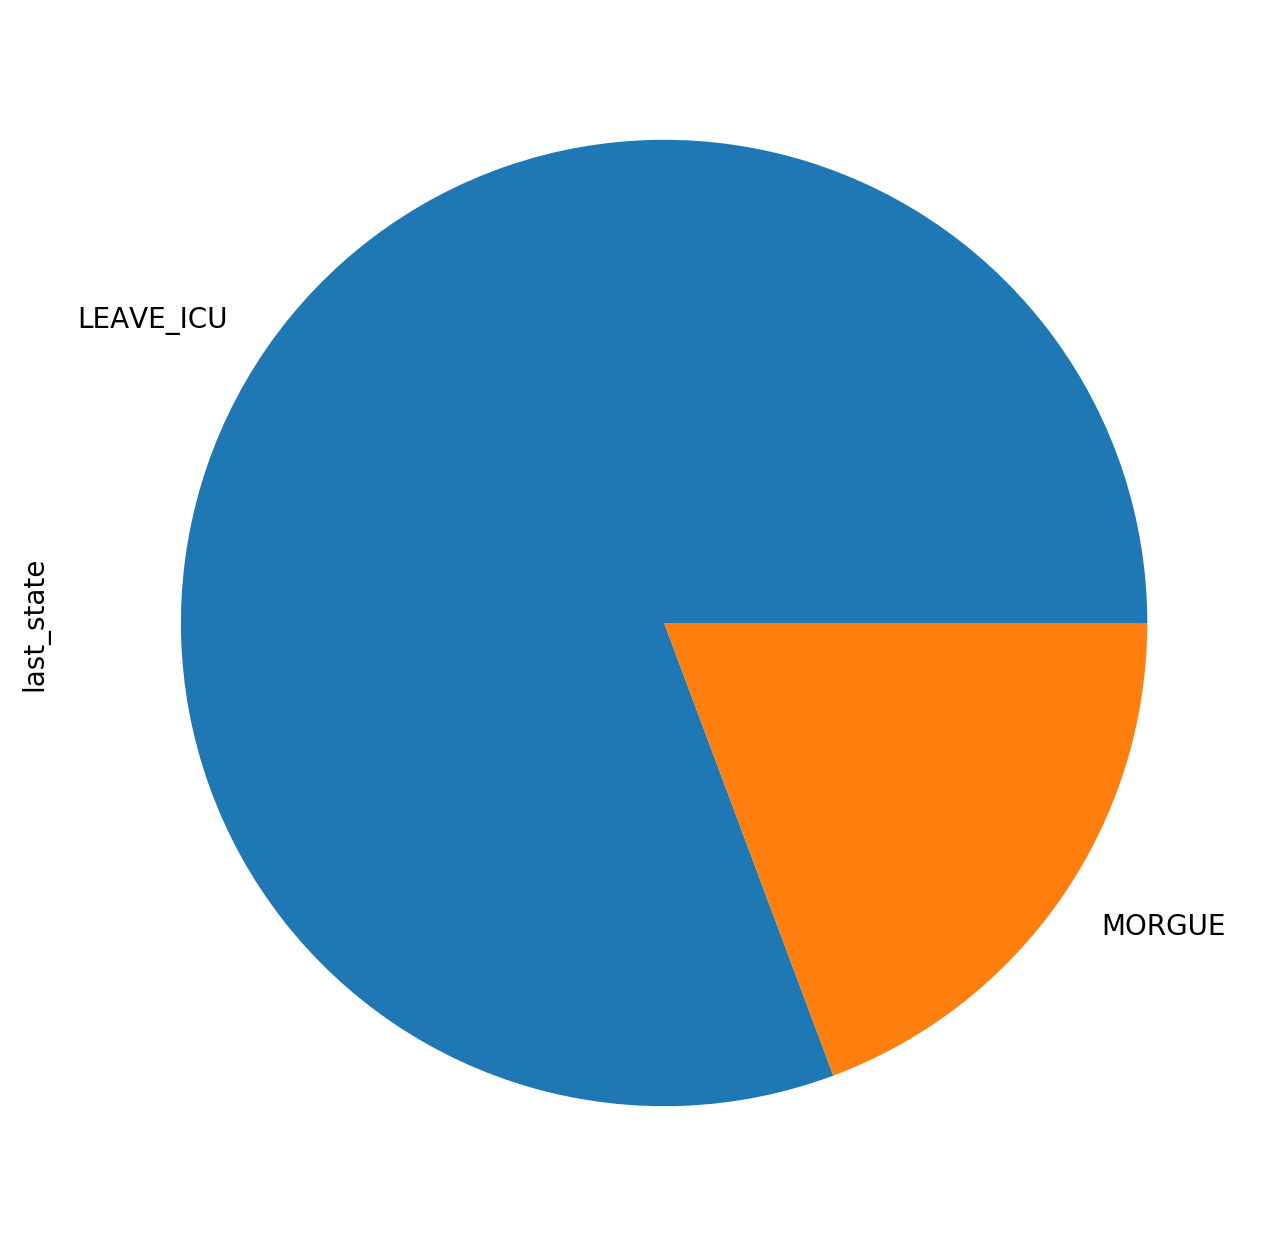

In [100]:
df = agents.patients
df[(df['last_state'] == 'LEAVE_ICU') | (df['last_state'] == 'MORGUE')]['last_state'].value_counts().plot.pie()

In [101]:
import postprocess as pp
df = pd.concat([agents.patients, agents.staff])

In [102]:
df = df[df['infected_by'] != '']
itime = df['incubation_end'] - df['infection_time']

In [103]:
itime.describe()

count                        18713
mean     3 days 07:10:45.324694062
std      1 days 13:25:05.377699676
min                0 days 14:00:57
25%                1 days 23:12:25
50%                3 days 06:52:53
75%                4 days 15:32:54
max                5 days 23:59:59
dtype: object